In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rc('font',**{'family':'serif','serif':['serif']})
mpl.rc('text', usetex=True)
import fitsio as fio

import h5py

import copy

import xpipe.tools.catalogs as catalogs
import xpipe.paths as paths
import xpipe.xhandle.parbins as parbins
import xpipe.xhandle.xwrap as xwrap
import xpipe.tools.selector as selector
import xpipe.xhandle.shearops as shearops
import xpipe.xhandle.pzboost as pzboost
import xpipe.tools.y3_sompz as sompz
import xpipe.tools.mass as mass
import xpipe.tools.visual as visual


from importlib import reload
import pickle


import astropy.cosmology as cosmology
# this is just the default cosmology
cosmo = cosmology.FlatLambdaCDM(Om0=0.3, H0=70)

# we make sure the correct config file is loaded here, it will let us automatically now what type of files 
# were / will be produced, and where they will be placed
paths.update_params("/home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb-v02_meta.yml")

reading DEFAULTS from default_params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3rm_meta.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb-v02_meta.yml

***********************

running in full mode

***********************



# Testing output

In [2]:
main_file_path = "/e/ocean1/users/vargatn/DESY3/Y3_mastercat_03_31_20.h5"
src = sompz.sompz_reader(main_file_path)
src.build_lookup()

In [3]:
flist, flist_jk, rlist, rlist_jk = parbins.get_file_lists(paths.params, paths.dirpaths)

# Compare with some old measurement

In [4]:
reload(shearops)

<module 'xpipe.xhandle.shearops' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py'>

In [5]:
ms_opt2=[np.array([-0.024,-0.037]),np.array([-0.024,-0.037]),np.array([-0.037,]),np.array([-0.037,])]
optsbins2=[(2,3),(2,3),(3,),(3,)]
# ACP_old = []
ACP_new = []
for i, fname in enumerate(flist):
    mfac_opt2=1/(1+ms_opt2[i])
    
    ACP = shearops.AutoCalibrateProfile([flist[i],], flist_jk[i], src, xlims=(0.01, 100), sbins=optsbins2[i])
    ACP.get_profiles(ismeta=False, id_key="ID", z_key="Z", mfactor_sbins=mfac_opt2) #
    ACP_new.append(ACP)    
    

loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-0.fits
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-1.fits
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-2.fits
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-3.fits


In [6]:
def write_profile(prof, path):
    """saves DeltaSigma and covariance in text format"""

    # Saving profile
    profheader = "R [Mpc]\tDeltaSigma_t [M_sun / pc^2]\tDeltaSigma_t_err [M_sun / pc^2]\tDeltaSigma_x [M_sun / pc^2]\tDeltaSigma_x_err [M_sun / pc^2]"
    res = np.vstack((prof.rr, prof.dst, prof.dst_err, prof.dsx, prof.dsx_err)).T
    fname = path + "_profile.dat"
    print("saving:", fname)
    np.savetxt(fname, res, header=profheader)

    # Saving covariance
    np.savetxt(path + "_dst_cov.dat", prof.dst_cov)
    np.savetxt(path + "_dsx_cov.dat", prof.dsx_cov)

In [9]:
# tmp_profs = copy.deepcopy(profiles)
fnames = []
for i in np.arange(4):
#     for s in np.arange(3):
#         scinv = scinvs[i][s+1]
#         prof = tmp_profs[i][s]
#         prof.multiply(1 / scinv)
        fname = "LWB_test_NEW_zbin"+str(i)
        fnames.append(fname)
        write_profile(ACP_new[i].profile, fname)

saving: LWB_test_NEW_zbin0_profile.dat
saving: LWB_test_NEW_zbin1_profile.dat
saving: LWB_test_NEW_zbin2_profile.dat
saving: LWB_test_NEW_zbin3_profile.dat


Text(0, 0.5, '$R\\cdot\\Delta\\Sigma$ [$M_\\odot  / pc$]')

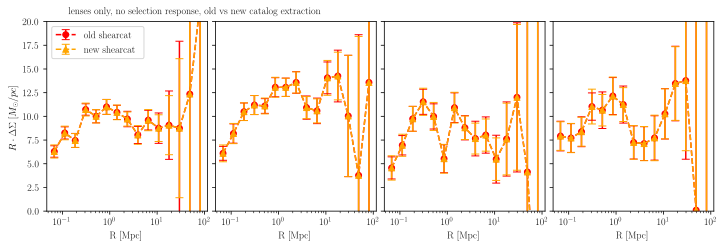

In [15]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):


    tab = np.loadtxt("LWB_test_OLD_zbin"+str(i)+"_profile.dat")
    axarr[i].errorbar(tab[:, 0],  tab[:, 0] * tab[:, 1], yerr=tab[:, 0]* tab[:, 2], capsize=4,
                      color="red", ls="--", marker="o",
                      label="old shearcat")       
    
    tab = np.loadtxt("LWB_test_NEW_zbin"+str(i)+"_profile.dat")
    axarr[i].errorbar(tab[:, 0],  tab[:, 0] * tab[:, 1], yerr=tab[:, 0]* tab[:, 2], capsize=4,
                      color="orange", ls="--", marker="^",
                      label="new shearcat")   


    
#     tab = np.loadtxt("LWB_lowz+cmass-100Mpc_boost_rand-subtr_NO-RSel_zbin"+str(i)+"_combined_v3-alternate-optsbins_profile.dat")
#     axarr[i].errorbar(tab[:, 0],  tab[:, 0] * tab[:, 1], yerr=tab[:, 0]* tab[:, 2], capsize=4,
#                       color="red", ls="-", marker="x",
#                       label="v2 alternate optbins")   
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")

    axarr[i].set_ylim(-0, 20)
    
axarr[0].legend()
    
fig.text(0.15, 0.91, "lenses only, no selection response, old vs new catalog extraction")
axarr[0].set_ylabel("$R\cdot\Delta\Sigma$ [$M_\odot  / pc$]")